# Import csv and use pandas to create dataframe

In [1]:
import pandas as pd

### Import anomalous traffic - brute force simulation

In [2]:
badtraffic = pd.read_csv("UbuntuBruteForceValeria.pcap_Flow.csv")
badtraffic2 = pd.read_csv("Centosx3BruteFroce.pcap_Flow.csv")

In [3]:
bt = pd.DataFrame(badtraffic)
bt2 = pd.DataFrame(badtraffic2)

## DataFrame Bad Traffic Size

In [4]:
bt.shape

(8895, 84)

In [5]:
bt2.shape

(26771, 84)

### Features Extraction

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
bt = bt[['Src Port','Dst Port', \
         'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'FIN Flag Count',\
         'SYN Flag Count' ,'ACK Flag Count', 'PSH Flag Count']]

bt2 = bt2[['Src Port','Dst Port', \
         'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'FIN Flag Count',\
         'SYN Flag Count' ,'ACK Flag Count', 'PSH Flag Count']]

### Add a new column 'Label' = ssh-bruteforce to label anomalous traffic (brute force)

In [8]:
bt['Label'] = 'ssh-bruteforce'
bt2['Label'] = 'ssh-bruteforce'

In [9]:
anomaloustraffic = [bt, bt2]

bad = pd.concat(anomaloustraffic)

## Import csv of IDS (good traffic) - pandas to create dataframe

In [10]:
goodtraffic = pd.read_csv(r"C:\Users\Tandoi\Desktop\Progetto Master\Test PCAP\ids_data.csv")

In [11]:
gt = pd.DataFrame(goodtraffic)

In [12]:
gt.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,172.25.75.126-172.16.68.58-60598-22-6,172.25.75.126,60598,172.16.68.58,22,6,20/02/2020 06:37:51 AM,12209565,130,70,2856.0,6448.0,188.0,0.0,21.969231,29.373811,1368.0,36.0,92.114286,222.925967,762.025510,16.380600,6.135460e+04,5.092299e+05,7020029.0,1.0,12209565.0,9.464779e+04,6.308373e+05,7020029.0,3.0,12205863.0,1.768966e+05,8.581300e+05,7027831.0,1.0,1,0,0,0,4160,2240,10.647390,5.733210,0.0,1368.0,46.467662,137.191691,18821.560199,0,0,0,130,200,0,0,0,0.0,46.700000,21.969231,92.114286,0,0,0,0,44,2334,0,14,0,32,2048,356,61,32,0,0,0,0,1.582199e+15,3.688658e+06,1.582199e+15,1.582199e+15,NeedManualLabel
1,172.25.75.126-172.16.68.56-60603-22-6,172.25.75.126,60603,172.16.68.56,22,6,20/02/2020 06:36:44 AM,34823465,54,36,824.0,5104.0,44.0,0.0,15.259259,18.682234,1368.0,0.0,141.777778,305.653315,170.230045,2.584464,3.912749e+05,3.112204e+06,29276513.0,3.0,34823465.0,6.570465e+05,4.026588e+06,29276513.0,3.0,34816392.0,9.947541e+05,4.945468e+06,29279587.0,4.0,1,0,0,0,1728,1176,1.550679,1.033786,0.0,1368.0,65.538462,200.969003,40388.540171,0,0,0,54,90,0,0,0,0.0,66.266667,15.259259,141.777778,0,0,0,0,18,2045,0,9,0,56,2048,399,21,32,0,0,0,0,1.582199e+15,9.766441e+06,1.582199e+15,1.582199e+15,NeedManualLabel
2,172.25.75.126-172.16.68.58-60536-22-6,172.25.75.126,60536,172.16.68.58,22,6,20/02/2020 06:37:55 AM,8987891,10,6,448.0,696.0,188.0,0.0,44.800000,76.890687,188.0,36.0,116.000000,68.258333,127.282362,1.780173,5.991927e+05,2.310391e+06,8950729.0,4.0,8987891.0,9.986546e+05,2.982040e+06,8950729.0,5.0,8979662.0,1.795932e+06,4.001291e+06,8953631.0,4.0,1,0,0,0,320,192,1.112608,0.667565,0.0,188.0,78.352941,82.268570,6768.117647,0,0,0,10,16,0,0,0,0.0,83.250000,44.800000,116.000000,0,0,0,0,5,33885,0,28,0,43,2048,355,3,32,0,0,0,0,1.582199e+15,4.456939e+06,1.582199e+15,1.582199e+15,NeedManualLabel
3,172.25.75.126-172.16.68.56-60534-22-6,172.25.75.126,60534,172.16.68.56,22,6,20/02/2020 06:36:46 AM,59600,6,4,72.0,320.0,36.0,0.0,12.000000,18.590320,124.0,36.0,80.000000,50.806824,6577.181208,167.785235,6.622222e+03,1.782849e+04,54114.0,3.0,59600.0,1.192000e+04,2.469581e+04,56016.0,3.0,56150.0,1.871667e+04,3.228493e+04,55996.0,7.0,1,0,0,0,192,128,100.671141,67.114094,0.0,124.0,38.909091,45.363983,2057.890909,0,0,0,6,10,0,0,0,0.0,42.800000,12.000000,80.000000,0,0,0,0,6,6777,0,7,0,32,2048,355,1,32,0,0,0,0,1.582199e+15,2.910616e+04,1.582199e+15,1.582199e+15,NeedManualLabel
4,172.25.75.126-172.16.68.57-60535-22-6,172.25.75.126,60535,172.16.68.57,22,6,20/02/2020 06:36:54 AM,33717520,18,10,896.0,1240.0,188.0,0.0,49.777778,77.444140,188.0,36.0,124.000000,62.425066,63.349855,0.830429,1.248797e+06,4.311826e+06,16552241.0,3.0,33717520.0,1.983384e+06,5.353853e+06,16552241.0,3.

### Features Extraction

In [13]:
good = gt[['Src Port', 'Dst Port', \
         'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'FIN Flag Count',\
         'SYN Flag Count' ,'ACK Flag Count', 'PSH Flag Count']]

In [14]:
good['Label'] = 'not-ssh-bruteforce'

C:\Users\Tandoi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
good.head()

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Length of Fwd Packet,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Label
0,60598,22,12209565,130,2856.0,0,0,200,130,not-ssh-bruteforce
1,60603,22,34823465,54,824.0,0,0,90,54,not-ssh-bruteforce
2,60536,22,8987891,10,448.0,0,0,16,10,not-ssh-bruteforce
3,60534,22,59600,6,72.0,0,0,10,6,not-ssh-bruteforce
4,60535,22,33717520,18,896.0,0,0,28,18,not-ssh-bruteforce


In [16]:
good.shape

(17954, 10)

## Final Dataframe

In [17]:
frames = [bad, good]

result = pd.concat(frames)

In [18]:
result.head()

,Src Port,Dst Port,Flow Duration,Total Fwd Packet,Total Length of Fwd Packet,FIN Flag Count,SYN Flag Count,ACK Flag Count,PSH Flag Count,Label
0,38878,22,150206,14,1202.0,1,2,24,12,ssh-bruteforce
1,38958,22,27704,3,22.0,1,2,4,1,ssh-bruteforce
2,38962,22,20619,3,22.0,1,2,4,1,ssh-bruteforce
3,38990,22,6692,3,22.0,1,2,4,1,ssh-bruteforce
4,38872,22,12114834,18,1654.0,1,2,38,23,ssh-bruteforce


## Target Proportion

In [19]:
target_count = result.Label.value_counts()
print('Class 0:', target_count['not-ssh-bruteforce'])
print('Class 1:', target_count['ssh-bruteforce'])
print('Proportion:', round(target_count['not-ssh-bruteforce'] / target_count['ssh-bruteforce'], 2), ': 1')



Class 0: 17954
Class 1: 35666
Proportion: 0.5 : 1


In [20]:
import matplotlib.pyplot as plt

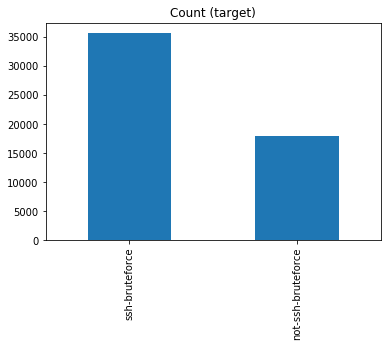

In [21]:
target_count.plot(kind='bar', title='Count (target)')

## DOWNSAMPLE MAJORITY CLASS

In [22]:
from sklearn.utils import resample

In [23]:
# Separate majority and minority classes
result_majority = result[result.Label=="ssh-bruteforce"]
result_minority = result[result.Label=="not-ssh-bruteforce"]

# Downsample majority class
result_majority_downsampled = resample(result_majority, replace=False, n_samples=17954, random_state=123)
 


In [24]:
# Combine minority class with downsampled majority class
result_downsampled = pd.concat([result_majority_downsampled, result_minority])
 
# Display new class counts
result_downsampled.Label.value_counts()

ssh-bruteforce        17954
not-ssh-bruteforce    17954
Name: Label, dtype: int64

## Import libraries for ML

In [25]:
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
# Creating feature set and labels
dataset = result_downsampled.values
X = dataset[:,0:9].astype(float)
Y = dataset[:,9]

In [27]:
# Turning labels into encoded variables
# (essentially booleans for this binary classifier)
le = LabelEncoder()

In [28]:
le.fit(Y)
encoded_Y = le.transform(Y)

In [29]:
# Splitting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, encoded_Y, test_size=0.2)

## RANDOM FOREST IMPLEMENTATION

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [31]:
rf_estimator = RandomForestClassifier(max_depth=2, random_state=0)

In [32]:
rf_estimator.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
prediction = rf_estimator.predict(X_test)

In [34]:
features = ['Src Port', 'Dst Port', \
         'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'FIN Flag Count',\
         'SYN Flag Count' ,'ACK Flag Count', 'PSH Flag Count']

In [35]:
f_imp = rf_estimator.feature_importances_

In [36]:
Importance = pd.DataFrame({'feature': features, 'feature_importance': f_imp})

In [37]:
Importance

,feature,feature_importance
0,Src Port,0.008323
1,Dst Port,0.007301
2,Flow Duration,0.269728
3,Total Fwd Packet,0.014817
4,Total Length of Fwd Packet,0.184417
5,FIN Flag Count,0.264837
6,SYN Flag Count,0.117228
7,ACK Flag Count,0.032236
8,PSH Flag Count,0.101113


In [38]:
i = 0
correct_predictions = 0
incorrect_predictions = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for item in prediction:
    if((item == 1) and (Y_test[i] == 1)):
        correct_predictions += 1
        true_positive += 1
    elif((item == 0) and (Y_test[i] == 0)):
        correct_predictions += 1
        true_negative += 1
    elif((item == 0) and (Y_test[i] == 1)):
        incorrect_predictions += 1
        false_negative += 1
    elif((item == 1) and (Y_test[i] == 0)):
        incorrect_predictions += 1
        false_positive += 1
        
    i += 1

In [39]:
# Manually printing values for validation
print("\n\nRandom Forest")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (correct_predictions))
print("Total incorrect predictions: %d" % (incorrect_predictions))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive))
print("True negatives: %d" % (true_negative))
print("False positives: %d" % (false_positive))
print("False negatives: %d" % (false_negative))



Random Forest
Total entries: 7182
Total correct predictions: 6819
Total incorrect predictions: 363
-------------- Breakdown ---------------
True positives: 3653
True negatives: 3166
False positives: 363
False negatives: 0


In [40]:
# K-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(rf_estimator, X_train, Y_train, cv=kfold)
print("Cross Validation Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Printing accuracy results
print('\nPrediction accuracy:\n')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, prediction)))

# Printing classification report
print(classification_report(Y_test, prediction, target_names=["not-ssh-bruteforce", "ssh-bruteforce"]))

# Printing confusion matrix
print(confusion_matrix(Y_test, prediction))

Cross Validation Results: 95.00% (0.39%)

Prediction accuracy:

94.95%

                    precision    recall  f1-score   support

not-ssh-bruteforce       1.00      0.90      0.95      3529
    ssh-bruteforce       0.91      1.00      0.95      3653

          accuracy                           0.95      7182
         macro avg       0.95      0.95      0.95      7182
      weighted avg       0.95      0.95      0.95      7182

[[3166  363]
 [   0 3653]]


In [41]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

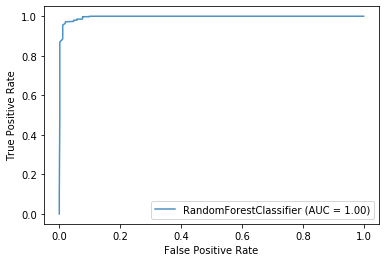

In [42]:
ax = plt.gca()
rfc_disp = plot_roc_curve(rf_estimator, X_test, Y_test, ax=ax, alpha=0.8)
plt.show()

## K-NEAREST NEIGHBORS IMPLEMENTATION

In [43]:
knn_estimator = make_pipeline(StandardScaler(), PCA(n_components=5), KNeighborsClassifier(n_neighbors=7))
knn_estimator.fit(X_train, Y_train)
predictions = knn_estimator.predict(X_test)

In [44]:
i = 0
correct_predictions = 0
incorrect_predictions = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for item in predictions:
    if((item == 1) and (Y_test[i] == 1)):
        correct_predictions += 1
        true_positive += 1
    elif((item == 0) and (Y_test[i] == 0)):
        correct_predictions += 1
        true_negative += 1
    elif((item == 0) and (Y_test[i] == 1)):
        incorrect_predictions += 1
        false_negative += 1
    elif((item == 1) and (Y_test[i] == 0)):
        incorrect_predictions += 1
        false_positive += 1
        
    i += 1

In [45]:
# Manually printing values for validation
print("\n\nKNN")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (correct_predictions))
print("Total incorrect predictions: %d" % (incorrect_predictions))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive))
print("True negatives: %d" % (true_negative))
print("False positives: %d" % (false_positive))
print("False negatives: %d" % (false_negative))



KNN
Total entries: 7182
Total correct predictions: 6970
Total incorrect predictions: 212
-------------- Breakdown ---------------
True positives: 3574
True negatives: 3396
False positives: 133
False negatives: 79


In [46]:
# K-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(knn_estimator, X_train, Y_train, cv=kfold)
print("Cross Validation Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Printing accuracy results
print('\nPrediction accuracy:\n')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, predictions)))

# Printing classification report
print(classification_report(Y_test, predictions, target_names=["not-ssh-bruteforce", "ssh-bruteforce"]))

# Printing confusion matrix
print(confusion_matrix(Y_test, predictions))

Cross Validation Results: 97.36% (0.21%)

Prediction accuracy:

97.05%

                    precision    recall  f1-score   support

not-ssh-bruteforce       0.98      0.96      0.97      3529
    ssh-bruteforce       0.96      0.98      0.97      3653

          accuracy                           0.97      7182
         macro avg       0.97      0.97      0.97      7182
      weighted avg       0.97      0.97      0.97      7182

[[3396  133]
 [  79 3574]]


## NAIVE BAYES IMPLEMENTATION

In [47]:
gaussian_estimator = make_pipeline(PCA(n_components=5), GaussianNB())
gaussian_estimator.fit(X_train, Y_train)
predictions = gaussian_estimator.predict(X_test)

In [48]:
# Manually collecting statistics for verification
i = 0
correct_predictions = 0
incorrect_predictions = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for item in predictions:
    if((item == 1) and (Y_test[i] == 1)):
        correct_predictions += 1
        true_positive += 1
    elif((item == 0) and (Y_test[i] == 0)):
        correct_predictions += 1
        true_negative += 1
    elif((item == 0) and (Y_test[i] == 1)):
        incorrect_predictions += 1
        false_negative += 1
    elif((item == 1) and (Y_test[i] == 0)):
        incorrect_predictions += 1
        false_positive += 1
        
    i += 1

In [49]:
# Manually printing values for validation
print("\n\nNAIVE BAYES")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (correct_predictions))
print("Total incorrect predictions: %d" % (incorrect_predictions))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive))
print("True negatives: %d" % (true_negative))
print("False positives: %d" % (false_positive))
print("False negatives: %d" % (false_negative))



NAIVE BAYES
Total entries: 7182
Total correct predictions: 6408
Total incorrect predictions: 774
-------------- Breakdown ---------------
True positives: 3653
True negatives: 2755
False positives: 774
False negatives: 0


In [50]:
# K-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(gaussian_estimator, X_train, Y_train, cv=kfold)
print("Cross Validation Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Printing accuracy results
print('\nPrediction accuracy:\n')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, predictions)))

# Printing classification report
print(classification_report(Y_test, predictions, target_names=["not-ssh-bruteforce", "ssh-bruteforce"]))

Cross Validation Results: 88.73% (0.58%)

Prediction accuracy:

89.22%

                    precision    recall  f1-score   support

not-ssh-bruteforce       1.00      0.78      0.88      3529
    ssh-bruteforce       0.83      1.00      0.90      3653

          accuracy                           0.89      7182
         macro avg       0.91      0.89      0.89      7182
      weighted avg       0.91      0.89      0.89      7182



In [51]:
# Printing confusion matrix
print(confusion_matrix(Y_test, predictions))

[[2755  774]
 [   0 3653]]


## DECISION TREE IMPLEMENTATION

In [52]:
tree_estimator=tree.DecisionTreeClassifier()
tree_estimator.fit(X_train, Y_train)
predictions = tree_estimator.predict(X_test)

In [53]:
i = 0
correct_predictions = 0
incorrect_predictions = 0
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0
for item in predictions:
    if((item == 1) and (Y_test[i] == 1)):
        correct_predictions += 1
        true_positive += 1
    elif((item == 0) and (Y_test[i] == 0)):
        correct_predictions += 1
        true_negative += 1
    elif((item == 0) and (Y_test[i] == 1)):
        incorrect_predictions += 1
        false_negative += 1
    elif((item == 1) and (Y_test[i] == 0)):
        incorrect_predictions += 1
        false_positive += 1
        
    i += 1

In [54]:
# Manually printing values for validation
print("\n\nDecision Tree")
print("Total entries: %d" % (i))
print("Total correct predictions: %d" % (correct_predictions))
print("Total incorrect predictions: %d" % (incorrect_predictions))
print("-------------- Breakdown ---------------")
print("True positives: %d" % (true_positive))
print("True negatives: %d" % (true_negative))
print("False positives: %d" % (false_positive))
print("False negatives: %d" % (false_negative))



Decision Tree
Total entries: 7182
Total correct predictions: 7165
Total incorrect predictions: 17
-------------- Breakdown ---------------
True positives: 3646
True negatives: 3519
False positives: 10
False negatives: 7


In [55]:
# K-fold cross validation
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(tree_estimator, X_train, Y_train, cv=kfold)
print("Cross Validation Results: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# Printing accuracy results
print('\nPrediction accuracy:\n')
print('{:.2%}\n'.format(metrics.accuracy_score(Y_test, predictions)))

# Printing classification report
print(classification_report(Y_test, predictions, target_names=["not-ssh-bruteforce", "ssh-bruteforce"]))

# Printing confusion matrix
print(confusion_matrix(Y_test, predictions))

Cross Validation Results: 99.83% (0.08%)

Prediction accuracy:

99.76%

                    precision    recall  f1-score   support

not-ssh-bruteforce       1.00      1.00      1.00      3529
    ssh-bruteforce       1.00      1.00      1.00      3653

          accuracy                           1.00      7182
         macro avg       1.00      1.00      1.00      7182
      weighted avg       1.00      1.00      1.00      7182

[[3519   10]
 [   7 3646]]


In [56]:
dot_data = tree.export_graphviz(tree_estimator, out_file=None, feature_names = result.columns[0:9], class_names = ["not-ssh-bruteforce", "ssh_bruteforce"])

In [57]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Tandoi\graphviz-2.38\release\bin'

In [58]:
# Create decision tree graph
graphIDS = graphviz.Source(dot_data)

In [59]:
graphIDS.render("IDS_bruteforce_tree")

'IDS_bruteforce_tree.pdf'